In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reduce size of dataset to 600 by extracting random values
idx_train = np.random.choice(np.arange(x_train.shape[0]), size=500)
idx_test = np.random.choice(np.arange(x_test.shape[0]), size=100)
x_train = np.array([x_train[i] for i in idx_train])
y_train = np.array([y_train[i] for i in idx_train])
x_test = np.array([x_test[i] for i in idx_test])
y_test = np.array([y_test[i] for i in idx_test])

print('x_train shape:', x_train.shape)

x_train shape: (500, 32, 32, 3)


In [0]:
trainset_size = x_train.shape[0]
testset_size = x_test.shape[0]
batch_size = 100
steps_per_epoch = np.ceil(trainset_size / batch_size).astype('int')
num_classes = 10
epochs = 100
# input shape: (32, 32, 3)
input_shape = x_train.shape[1:]

data_augmentation = False
#num_predictions = 20

print(trainset_size, 'train samples')
print(testset_size, 'test samples')

500 train samples
100 test samples


In [0]:
# Convert class vectors to binary (one-hot) class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
__________

In [0]:
# initiate RMSprop optimizer
#opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [0]:
# Let's train the model using AdamOptimizer
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Normalize input numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
results = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 500 samples, validate on 100 samples
Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 2.3056 - acc: 0.1200 - val_loss: 2.3002 - val_acc: 0.1000
Epoch 2/100
500/500 [==============================] - 0s 171us/step - loss: 2.2670 - acc: 0.1980 - val_loss: 2.2521 - val_acc: 0.1300
Epoch 3/100
500/500 [==============================] - 0s 165us/step - loss: 2.1810 - acc: 0.2560 - val_loss: 2.1245 - val_acc: 0.2600
Epoch 4/100
500/500 [==============================] - 0s 153us/step - loss: 2.0373 - acc: 0.2840 - val_loss: 1.9857 - val_acc: 0.2700
Epoch 5/100
500/500 [==============================] - 0s 151us/step - loss: 1.9130 - acc: 0.3020 - val_loss: 1.8870 - val_acc: 0.3300
Epoch 6/100
500/500 [==============================] - 0s 147us/step - loss: 1.8225 - acc: 0.3520 - val_loss: 1.9399 - val_acc: 0.2600
Epoch 7/100
500/500 [==============================] - 0s 146us/step - loss: 1.8518 - acc: 0.3260 - val_loss: 1.8288 - val_acc: 0.4100
Epoch 8/100

In [0]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

100/100 [==============================] - 0s 483us/step
Test loss: 3.167443218231201
Test accuracy: 0.47


In [0]:
# Accuracy for Training Dataset
plt_acc = results.history["acc"]
# Accuracy for Validation (Test) Dataset
plt_val_acc = results.history["val_acc"]

num_epochs = len(plt_val_acc)
plt_epoch = np.arange(1, num_epochs+1, 1, dtype=int)

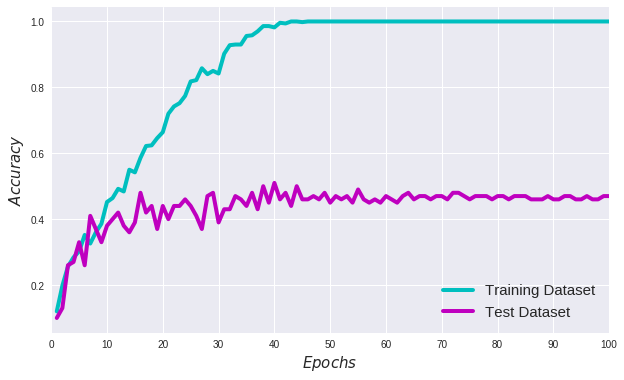

In [0]:
plt.figure(1, figsize=(10, 6))
plt.plot(plt_epoch, plt_acc, color='c', linewidth=4, label='Training Dataset')
plt.plot(plt_epoch, plt_val_acc, color='m', linewidth=4, label='Test Dataset')
plt.xlim(1, epochs)
plt.xticks(np.arange(0, num_epochs+1, 10, dtype=int))
plt.legend(loc='best', fontsize=15)
plt.xlabel(r'$Epochs$', fontsize=15)
plt.ylabel(r'$Accuracy$', fontsize=15)
plt.grid(True)
plt.show()